Multivariate Time Series with RNN


Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data

Let's read in the data set:

In [2]:
df = pd.read_csv('energydata_complete.csv',index_col='date',
                infer_datetime_format=True)

In [3]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


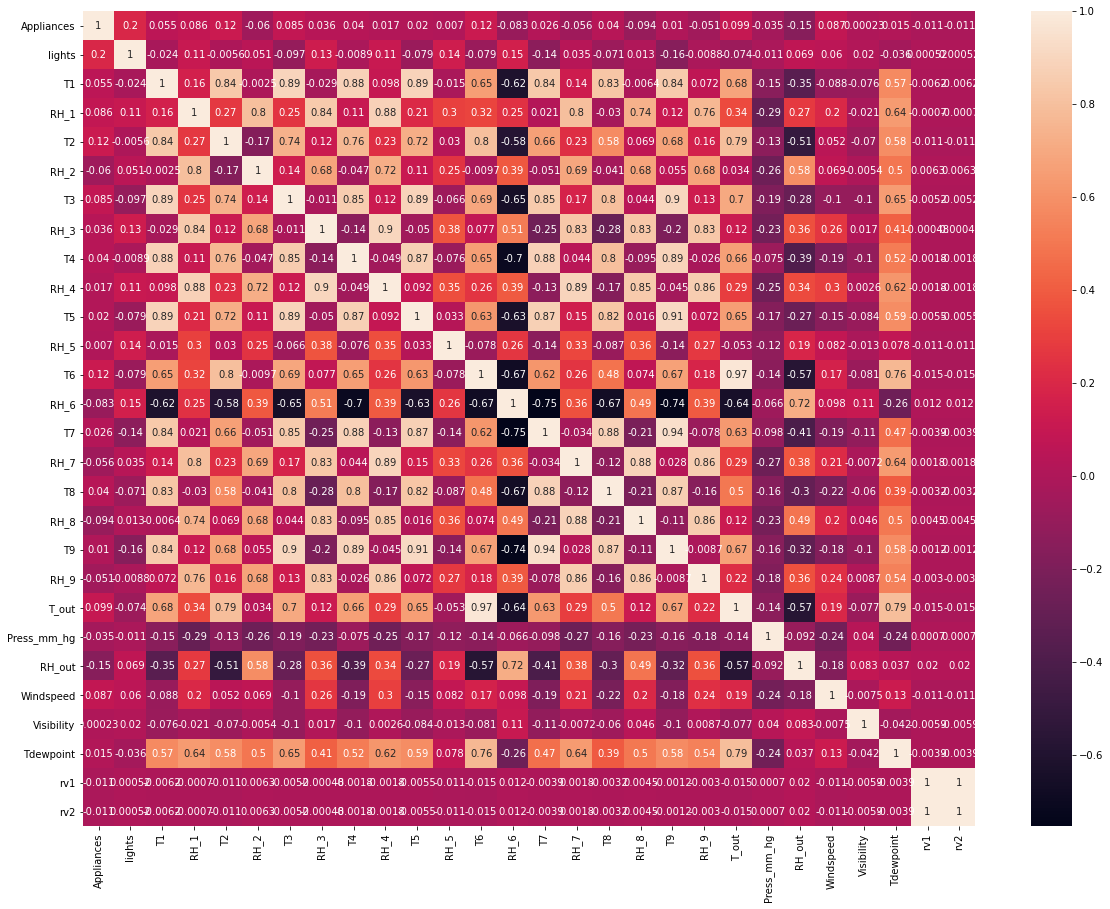

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

In [7]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [9]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7+ MB


Let's imagine we want to predict just 24 hours into the future, we don't need 3 months of data for that, so let's save some training time and only select the last months data.

In [11]:
df = df.loc['2016-05-01':]

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [12]:
df = df.round(2)

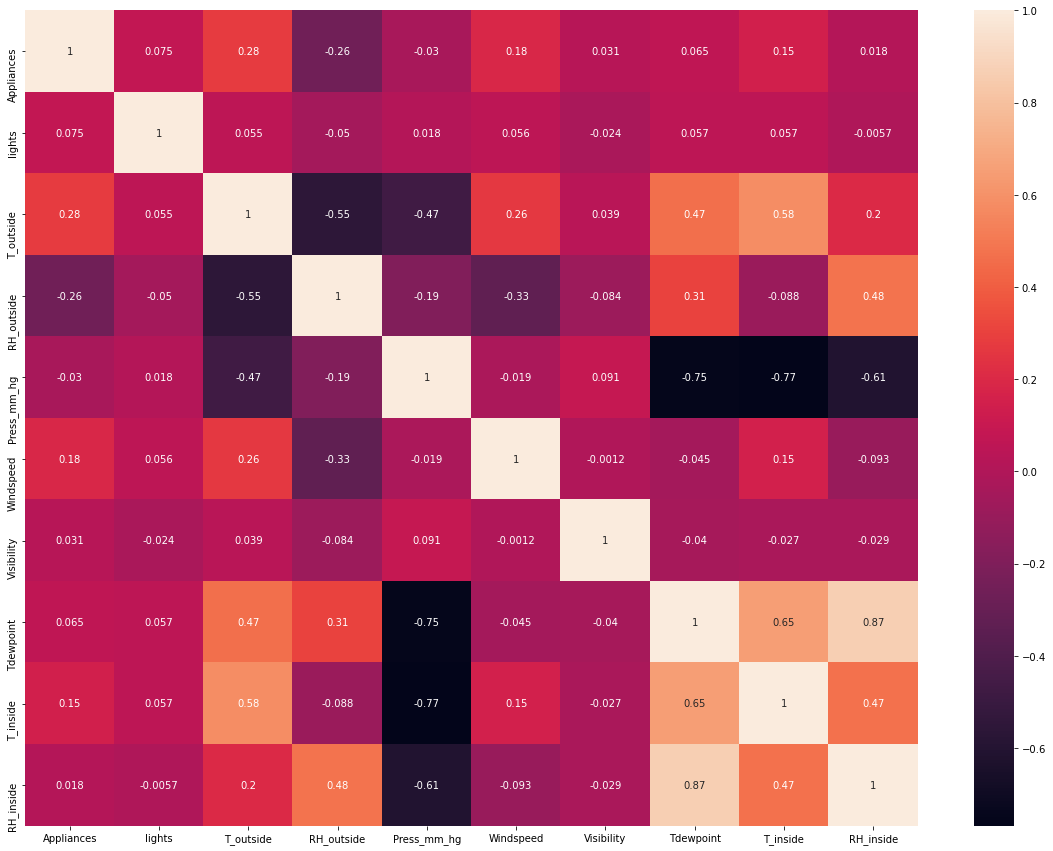

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

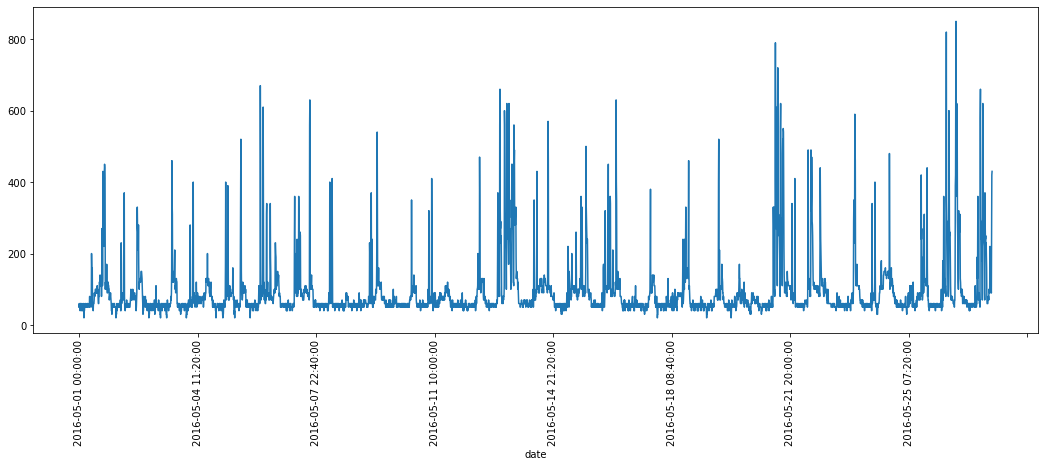

In [14]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

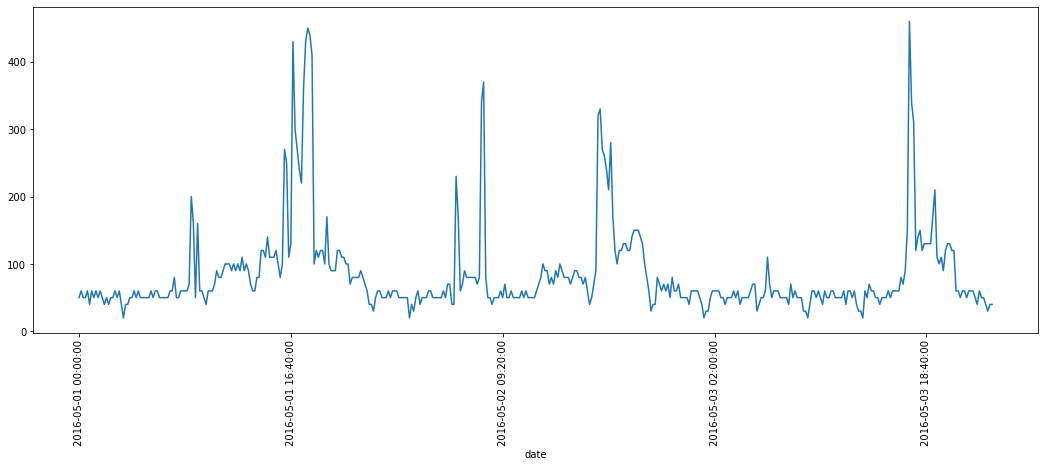

In [15]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:50:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

In [16]:
df1 = df.drop(df.columns[1:], axis = 1)

In [17]:
df1

,Appliances
date,
2016-05-01 00:00:00,50
2016-05-01 00:10:00,60
2016-05-01 00:20:00,50
2016-05-01 00:30:00,50
2016-05-01 00:40:00,60
...,...
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270


## Data Pre-Processing-1

### Train Test Split

In [18]:
len(df1)

3853

In [19]:
# How many rows per day? We know its every 10 min
24*60/10

144.0

In [20]:
test_days = 2

In [21]:
test_ind = test_days*144

In [22]:
test_ind

288

In [23]:
# Notice the minus sign in our indexing

train = df1.iloc[:-test_ind]
test = df1.iloc[-test_ind:]

In [24]:
train.shape, test.shape

((3565, 1), (288, 1))

### Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(train)

MinMaxScaler()

In [28]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [31]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3565, 3421, 288, 144)

In [63]:
model = Sequential()

model.add(LSTM(144,input_shape=(length, train_scaled.shape[1])))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [60]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [61]:
model.fit_generator(generator, epochs=1,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

C:\Users\ata\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


3421/3421 [==============================] - 347s 100ms/step - loss: 0.0050 - val_loss: 0.0047


<AxesSubplot:>

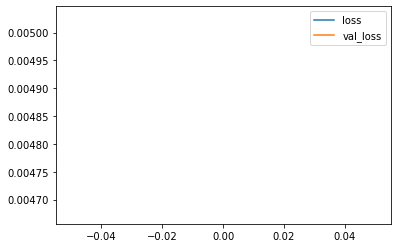

In [62]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [66]:
y_pred = model.predict(validation_generator)

In [41]:
eval_metrics(test_scaled[length:], y_pred)

r2_score: 0.5293279116242083 
mae: 0.04804345896308986 
mse: 0.010742788142651402 
rmse: 0.10364742226727784


In [42]:
n_features = train_scaled.shape[1]
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [43]:
eval_metrics(test_scaled, test_predictions)

r2_score: -0.28446846259967007 
mae: 0.10452028780266466 
mse: 0.04185596261105928 
rmse: 0.20458729826423555


## Inverse Transformations and Compare

In [58]:
true_predictions = scaler.inverse_transform(test_predictions)

ValueError: non-broadcastable output operand with shape (288,1) doesn't match the broadcast shape (288,10)

In [45]:
test['Predictions'] = true_predictions
test

C:\Users\ata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Appliances,Predictions
date,,
2016-05-25 18:10:00,170,106.203280
2016-05-25 18:20:00,310,101.721141
2016-05-25 18:30:00,120,95.089684
2016-05-25 18:40:00,120,88.590951
2016-05-25 18:50:00,120,83.528645
...,...,...
2016-05-27 17:20:00,100,62.588074
2016-05-27 17:30:00,90,62.588072
2016-05-27 17:40:00,270,62.588072


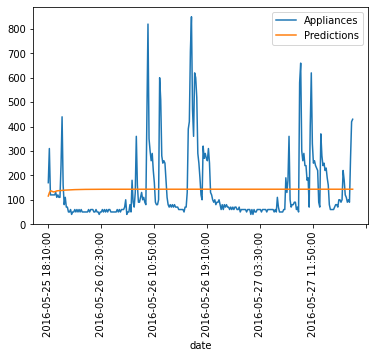

In [44]:
test.plot()
plt.xticks(rotation=90);

In [46]:
eval_metrics(test.Appliances, test.Predictions)

r2_score: -0.2844684625996703 
mae: 80.48062160805178 
mse: 24816.40023209705 
rmse: 157.53221966346138


## Data Pre-Processing-2

### Train Test Split

In [47]:
len(df)

3853

In [48]:
# Notice the minus sign in our indexing

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [48]:
train.shape, test.shape

((3565, 10), (288, 10))

### Scale Data

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
scaler.fit(train)

MinMaxScaler()

In [52]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [53]:
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [54]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3565, 3421, 288, 144)

In [54]:
model = Sequential()

model.add(LSTM(144,input_shape=(length, train_scaled.shape[1])))

model.add(Dense(train_scaled.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [55]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [57]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3421/3421 [==============================] - 219s 63ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 2/10
3421/3421 [==============================] - 224s 65ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 3/10
3421/3421 [==============================] - 225s 66ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 4/10
3421/3421 [==============================] - 228s 67ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 5/10
3421/3421 [==============================] - 226s 66ms/step - loss: 0.0023 - val_loss: 0.0038


In [57]:
losses = pd.DataFrame(model.history.history)
losses.plot()

AttributeError: 'NoneType' object has no attribute 'history'

## Evaluate on Test Data

In [59]:
n_features = train_scaled.shape[1]
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [60]:
test_predictions

[array([ 0.09162845,  0.01688146,  0.6780515 , -0.00161084,  0.5321031 ,
         0.21019305,  0.5949763 ,  0.5427047 ,  0.60947263,  0.37210506],
       dtype=float32),
 array([ 0.07843291,  0.0231791 ,  0.69028515, -0.0104383 ,  0.53677773,
         0.21989241,  0.5928937 ,  0.54821   ,  0.6184721 ,  0.3784755 ],
       dtype=float32),
 array([ 0.07251166,  0.02866389,  0.7044065 , -0.0224179 ,  0.5402788 ,
         0.22837913,  0.57840693,  0.5503194 ,  0.6283027 ,  0.38436568],
       dtype=float32),
 array([ 0.06975639,  0.03251197,  0.7201647 , -0.03598524,  0.5429274 ,
         0.23650418,  0.55636895,  0.5500088 ,  0.63824356,  0.38932943],
       dtype=float32),
 array([ 0.06836584,  0.03555424,  0.73691446, -0.0503632 ,  0.5447657 ,
         0.2445814 ,  0.53210473,  0.5479732 ,  0.64793897,  0.39332932],
       dtype=float32),
 array([ 0.06776296,  0.03819413,  0.75416857, -0.06524056,  0.54600513,
         0.2526636 ,  0.5102842 ,  0.544675  ,  0.6571598 ,  0.39623952],
   

In [61]:
test_scaled

array([[0.19480519, 0.        , 0.66777778, ..., 0.53372781, 0.5987055 ,
        0.3654943 ],
       [0.37662338, 0.        , 0.67037037, ..., 0.52840237, 0.59708738,
        0.36501901],
       [0.12987013, 0.        , 0.67185185, ..., 0.52366864, 0.59708738,
        0.36501901],
       ...,
       [0.32467532, 0.33333333, 0.82740741, ..., 0.86804734, 0.79935275,
        0.72718631],
       [0.51948052, 0.33333333, 0.78296296, ..., 0.86568047, 0.78964401,
        0.72718631],
       [0.53246753, 0.33333333, 0.73111111, ..., 0.86390533, 0.78640777,
        0.72480989]])

## Inverse Transformations and Compare

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)
true_predictions

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
0,90.553904,0.506444,19.597390,0.906910,756.231951,2.101931,40.698578,7.771709,23.646541,38.769091
1,80.393341,0.695373,19.927699,0.396771,756.338532,2.198924,40.573623,7.864749,23.702158,38.903124
2,75.833977,0.859917,20.308975,-0.295531,756.418356,2.283791,39.704416,7.900397,23.762911,39.027054
3,73.712419,0.975359,20.734447,-1.079587,756.478744,2.365042,38.382137,7.895148,23.824345,39.131491
4,72.641698,1.066627,21.186690,-1.910489,756.520658,2.445814,36.926284,7.860747,23.884263,39.215649
...,...,...,...,...,...,...,...,...,...,...
283,105.185357,1.428703,24.205326,-1.689480,757.411331,3.888411,37.344465,5.157372,24.172972,36.481363
284,105.185609,1.428702,24.205366,-1.689411,757.411316,3.888406,37.344497,5.157346,24.172977,36.481351
285,105.185856,1.428702,24.205402,-1.689347,757.411302,3.888400,37.344526,5.157323,24.172982,36.481341
286,105.186062,1.428702,24.205434,-1.689283,757.411286,3.888394,37.344551,5.157300,24.172986,36.481332


In [63]:
test

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-05-25 18:10:00,170,0,19.32,1.00,756.1,2.00,38.17,7.62,23.58,38.63
2016-05-25 18:20:00,310,0,19.39,1.00,756.1,2.00,36.33,7.53,23.57,38.62
2016-05-25 18:30:00,120,0,19.43,1.00,756.1,2.00,34.50,7.45,23.57,38.62
2016-05-25 18:40:00,120,0,19.36,1.00,756.1,2.00,32.67,7.37,23.60,38.67
2016-05-25 18:50:00,120,0,19.25,1.66,756.1,2.00,30.83,7.28,23.59,38.73
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,24.80,1.00,755.2,3.33,23.67,13.33,24.87,46.14
2016-05-27 17:30:00,90,0,24.20,1.00,755.2,3.50,24.50,13.30,24.85,46.09
2016-05-27 17:40:00,270,10,23.63,1.00,755.2,3.67,25.33,13.27,24.82,46.24


In [64]:
for i in test.columns:
    print(i)
    eval_metrics(test[i], true_predictions[i])
    print("--"*15)

Appliances
r2_score: -0.06877232507942743 
mae: 87.25826771283108 
mse: 20649.072007948896 
rmse: 143.6978496984172
------------------------------
lights
r2_score: -0.006665400807955635 
mae: 2.929523940482694 
mse: 29.534628820242087 
rmse: 5.4345771519265496
------------------------------
T_outside
r2_score: -1.8740034014832303 
mae: 6.187436724098194 
mse: 56.41540984860482 
rmse: 7.51101922834743
------------------------------
RH_outside
r2_score: -1.2456339395447968 
mae: 18.49527295924723 
mse: 607.5738418368949 
rmse: 24.6490129992439
------------------------------
Press_mm_hg
r2_score: -3.308317619066587 
mae: 1.0155323345959413 
mse: 1.5032009180919266 
rmse: 1.2260509443297725
------------------------------
Windspeed
r2_score: -5.132188643375792 
mae: 1.8925768735094204 
mse: 4.288554526382856 
rmse: 2.07088254770348
------------------------------
Visibility
r2_score: -0.0409565105203773 
mae: 14.471380052947337 
mse: 286.85455344333315 
rmse: 16.936781082700843
-------------

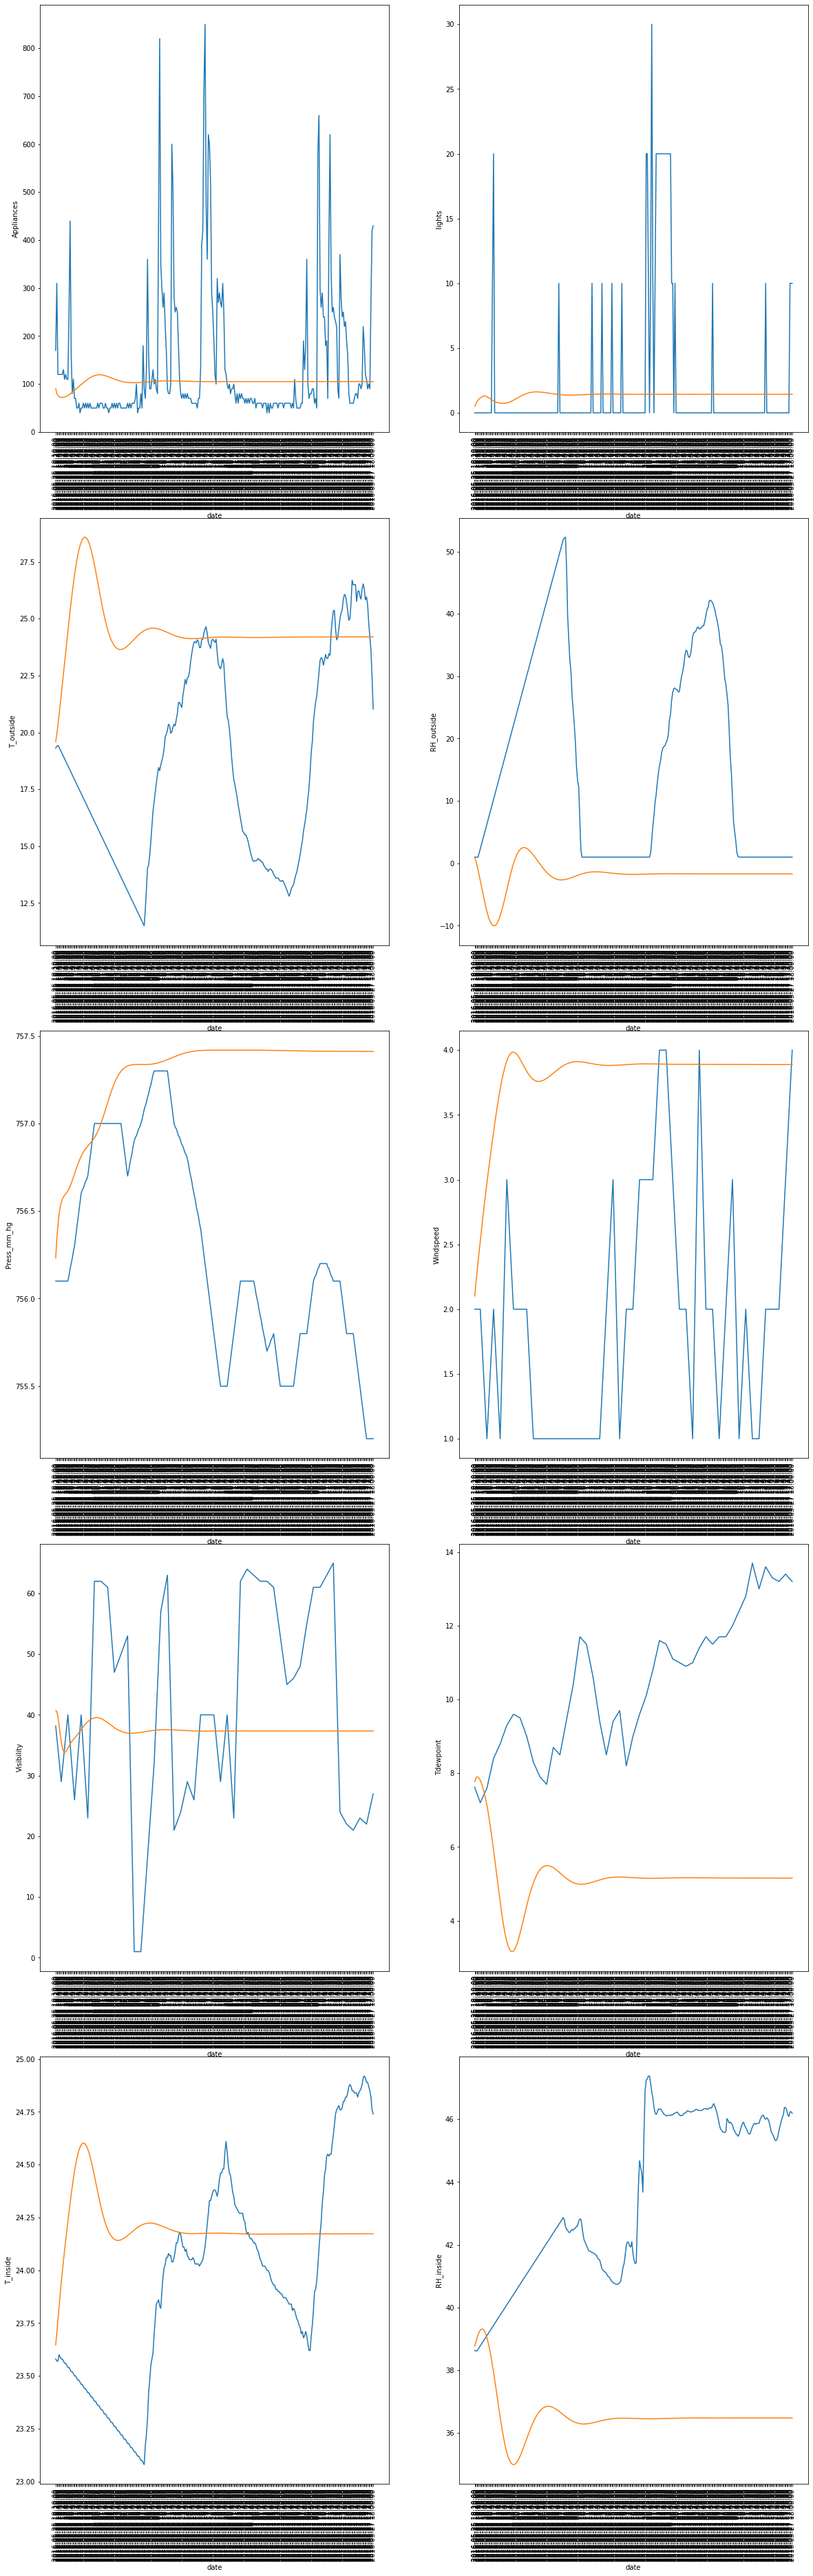

In [65]:
index = 0
plt.figure(figsize = (20, 80))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test[i])
    test_eva["predictions"] = true_predictions[i].values
    plt.subplot(6, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i], data = test_eva)
    sns.lineplot(x = test_eva.index, y = test_eva["predictions"], data = test_eva)
    plt.xticks(rotation=90);

## Arrangment of Dataset for RNN Model Manually

### Scale

In [66]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [67]:
f_columns = ['lights', 'T_inside', 'RH_inside', 'T_outside', 'Press_mm_hg', 'RH_outside',
             'Windspeed', 'Visibility', 'Tdewpoint']

f_transformer = MinMaxScaler()
target_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
target_transformer = target_transformer.fit(train[['Appliances']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Appliances'] = target_transformer.transform(train[['Appliances']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Appliances'] = target_transformer.transform(test[['Appliances']])

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

### Define a Function for Creating Time Steps 

In [68]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys) #x = np.asarray(x).astype('float32').

In [69]:
time_steps = 144

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Appliances, time_steps)
X_test, y_test = create_dataset(test, test.Appliances, time_steps)

print(X_train.shape, y_train.shape)

(3421, 144, 10) (3421,)


## Model Building with LSTM

In [87]:
model = Sequential()
model.add(Bidirectional(LSTM(units=144, input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [88]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [89]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          shuffle=False,
          callbacks=[early_stop])

Epoch 1/30
75/75 [==============================] - 32s 358ms/step - loss: 0.0161 - val_loss: 0.0230
Epoch 2/30
75/75 [==============================] - 25s 328ms/step - loss: 0.0116 - val_loss: 0.0119
Epoch 3/30
75/75 [==============================] - 26s 342ms/step - loss: 0.0100 - val_loss: 0.0114
Epoch 4/30
75/75 [==============================] - 26s 350ms/step - loss: 0.0129 - val_loss: 0.0100
Epoch 5/30
75/75 [==============================] - 25s 331ms/step - loss: 0.0127 - val_loss: 0.0170
Epoch 6/30
75/75 [==============================] - 26s 354ms/step - loss: 0.0085 - val_loss: 0.0118


<AxesSubplot:>

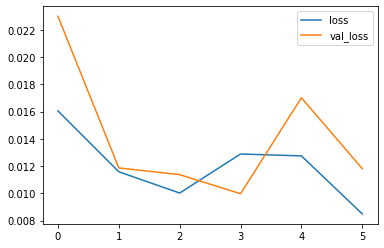

In [90]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [91]:
y_pred = model.predict(X_test)

In [92]:
eval_metrics(y_test, y_pred)

r2_score: 0.3063122666797964 
mae: 0.09346399191984689 
mse: 0.015832977013638234 
rmse: 0.1258291580423164


### Inverse Transform

In [93]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [94]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
date,,
2016-05-26 18:10:00,120.0,189.969421
2016-05-26 18:20:00,100.0,169.775391
2016-05-26 18:30:00,320.0,147.399902
2016-05-26 18:40:00,270.0,181.059830
2016-05-26 18:50:00,290.0,186.528320
...,...,...
2016-05-27 17:20:00,100.0,193.991211
2016-05-27 17:30:00,90.0,184.181656
2016-05-27 17:40:00,270.0,170.143143


In [95]:
eval_metrics(y_test_inv.flatten(), y_pred_inv.flatten())

r2_score: 0.3063122923333982 
mae: 71.96727244059245 
mse: 9387.371724227156 
rmse: 96.88844990104423


### Plot Prediction

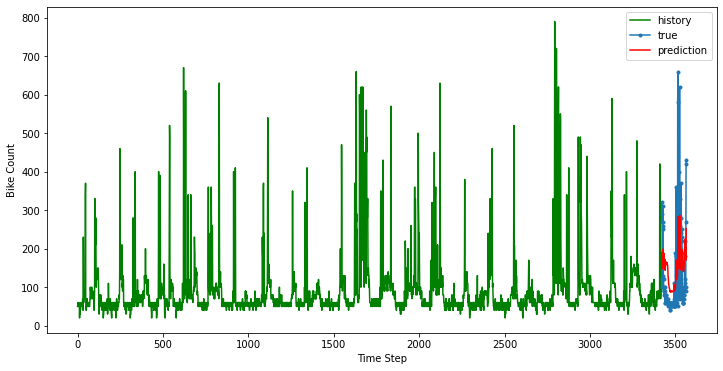

In [96]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

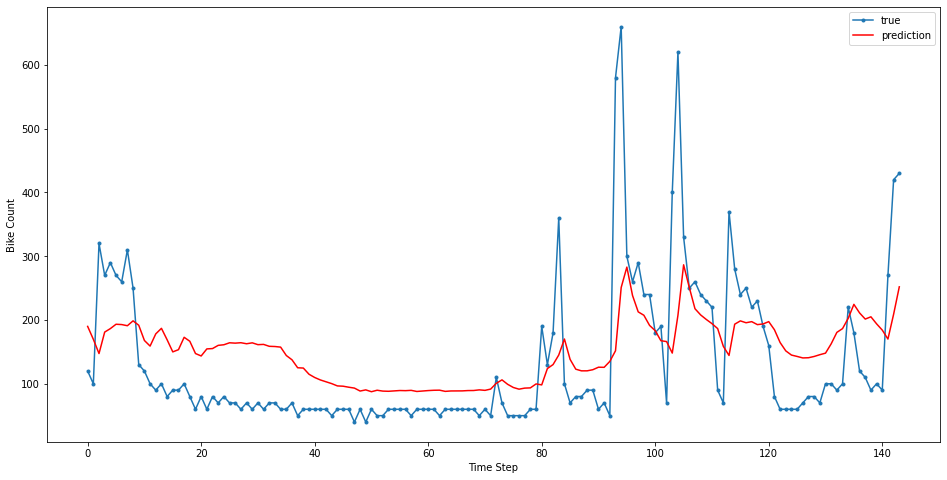

In [97]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Forecast and Comparing with Test Data

In [81]:
test_ev = test.iloc[:,1:].values

In [82]:
n_features = train.shape[1]
test_predictions = []

first_eval_batch = train[-time_steps:].values
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = test_ev.reshape((test_ev.shape[0], 1, test_ev.shape[1]))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    test_predictions.append(current_pred)
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,test.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [83]:
true_predictions = target_transformer.inverse_transform(np.array(test_predictions).reshape(1,-1))

In [84]:
df.iloc[-test_ind:]

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-05-25 18:10:00,170,0,0.667778,0.000000,0.526316,0.200,0.552833,0.533728,0.598706,0.365494
2016-05-25 18:20:00,310,0,0.670370,0.000000,0.526316,0.200,0.522167,0.528402,0.597087,0.365019
2016-05-25 18:30:00,120,0,0.671852,0.000000,0.526316,0.200,0.491667,0.523669,0.597087,0.365019
2016-05-25 18:40:00,120,0,0.669259,0.000000,0.526316,0.200,0.461167,0.518935,0.601942,0.367395
2016-05-25 18:50:00,120,0,0.665185,0.011421,0.526316,0.200,0.430500,0.513609,0.600324,0.370247
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,0.870741,0.000000,0.486842,0.333,0.311167,0.871598,0.807443,0.722433
2016-05-27 17:30:00,90,0,0.848519,0.000000,0.486842,0.350,0.325000,0.869822,0.804207,0.720057
2016-05-27 17:40:00,270,10,0.827407,0.000000,0.486842,0.367,0.338833,0.868047,0.799353,0.727186


In [85]:
df_test = pd.DataFrame(df.iloc[-test_ind:]["Appliances"], index = test.index)
df_test["predictions"] = true_predictions[0]
df_test

,Appliances,predictions
date,,
2016-05-25 18:10:00,170,130.173859
2016-05-25 18:20:00,310,135.515152
2016-05-25 18:30:00,120,140.310196
2016-05-25 18:40:00,120,145.668350
2016-05-25 18:50:00,120,151.026703
...,...,...
2016-05-27 17:20:00,100,223.160172
2016-05-27 17:30:00,90,224.201477
2016-05-27 17:40:00,270,225.286163


<AxesSubplot:xlabel='date'>

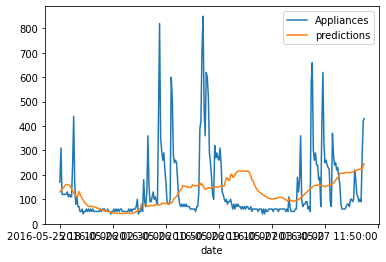

In [86]:
df_test.plot()